# 1. Load DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 2. Train

In [115]:
result_train = pd.read_csv("train_activity_party.csv")
result_test = pd.read_csv("test_activity_party.csv")

In [ ]:
del(result_train["Unnamed: 0"])
del(result_test["Unnamed: 0"])

In [206]:
result_train_drop_na = result_train.dropna(axis=1)
result_test_drop_na = result_test.dropna(axis=1)

In [208]:
X_train = result_train_drop_na.iloc[:,:-1]
print(X_train.shape)
X_train.head()

(100000, 335)


,wk_min,wk_count,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,party_Morning_mean_seconds,party_Noon_mean_seconds,party_Afternoon_mean_seconds,party_Evening_mean_seconds,party_Night_mean_seconds,party_member_solo,party_member_six,party_member_twelve,party_member_big,party_member_irregular
0,7,2,6.000000,3.627488,6.041965,-0.238288,6.825828,4.926936,-0.306354,2.555035,...,155.786561,270.70147,158.115813,217.701954,209.88035,1650.484,77348.468,350.44,0.0,71512.772
1,1,8,3.125000,-0.660696,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000,0.000,0.00,0.0,0.000
2,3,5,2.400000,-0.657060,-0.231703,-0.290803,-0.249534,-0.487666,-0.306354,-0.569130,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000,0.000,0.00,0.0,0.000
3,1,6,5.166667,-0.503199,-0.182299,-0.285875,-0.027648,-0.151896,-0.303584,-0.483064,...,1275.572250,414.14775,0.000000,0.000000,294.98400,411.713,8426.819,0.00,0.0,735.368
4,2,2,1.500000,-0.655214,-0.231447,-0.290803,-0.248201,-0.487666,-0.306354,-0.568189,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000,0.000,0.00,0.0,0.000


In [209]:
X_test = result_test_drop_na
print(X_test.shape)
X_test.head()

(40000, 335)


,wk_min,wk_count,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,party_Morning_mean_seconds,party_Noon_mean_seconds,party_Afternoon_mean_seconds,party_Evening_mean_seconds,party_Night_mean_seconds,party_member_solo,party_member_six,party_member_twelve,party_member_big,party_member_irregular
0,2,7,2.857143,-0.657683,-0.231874,-0.290803,-0.250423,-0.351862,-0.306354,-0.569842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,1.000000,-0.658370,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2,2.000000,-0.653661,-0.231447,-0.290803,-0.248201,-0.487666,-0.306354,-0.568189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2,3.000000,-0.654764,-0.231447,-0.290803,-0.248201,-0.487666,-0.306354,-0.568359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,4.000000,-0.654042,-0.231661,-0.290803,-0.249312,-0.487666,-0.306354,-0.568924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
y_train = result_train["label"]
print(y_train.shape)
y_train.head()

(100000,)


0        week
1    retained
2    retained
3       month
4      2month
Name: label, dtype: object

# 3. Compare Model 

In [211]:
import xgboost as xgb
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [212]:
dataframe1 = X_train[:10000]
array1 = dataframe1.values
dataframe2 = y_train[:10000]
array2 = dataframe2.values

X = array1
Y = array2

In [213]:
len(X)

10000

In [214]:
len(Y)

10000

In [215]:
from tqdm import tqdm_notebook

In [216]:
## compare Algorithms

import pandas as pd
import matplotlib.pyplot as plt
import lightgbm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier

In [217]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def f1(predict, actual):
    ## predict와 actual을 numpy array로 변환합니다.
   
    y_pred = np.array(predict)
    y_true = np.array(actual)

    ## Accuracy 측정
    accuracy = accuracy_score(y_true, y_pred)
    
    ## precision, recall, f1_score 측정
    precision, recall, f1_score, _  = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    ## f1_score만 변수에 대입
    score = f1_score
 
    return score

## make_scorer를 이용해서 f1 함수 사용
f1_score = make_scorer(f1)
f1_score

make_scorer(f1)

In [218]:
models = []
seed = 37

# prepare models
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('FOR', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier ()))
models.append(('MLP', MLPClassifier ()))
models.append(('GPC', GaussianProcessClassifier ()))
models.append(('LGBM', LGBMClassifier()))

0.5437092504370447 ( 0.057414823788663194 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5939849293086713 ( 0.008801958817017072 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTAC

0.553450480906324 ( 0.014404708738140117 )
0.590635495351061 ( 0.012406138718797763 )
0.6108663639295524 ( 0.0041062863159447354 )
0.6647898844389422 ( 0.01027660277072481 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning 

0.6884047559632039 ( 0.0144985250452257 )
0.451462751491044 ( 0.007699240564365477 )
0.5615424980287306 ( 0.008899756938278942 )
0.6247605102245302 ( 0.010001883489177764 )
0.5661949236558389 ( 0.010570137751680466 )
0.5426720162712875 ( 0.013170075202487 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTAC

0.553450480906324 ( 0.014404708738140117 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning 

0.6990655972226631 ( 0.012458497122835328 )


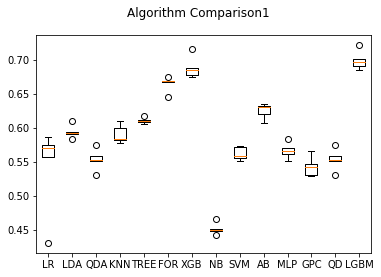

(14, 3)


,model,f1_score,std
13,LGBM,0.699066,0.012458
6,XGB,0.688405,0.014499
5,FOR,0.664790,0.010277
9,AB,0.624761,0.010002
4,TREE,0.610866,0.004106
1,LDA,0.593985,0.008802
3,KNN,0.590635,0.012406
10,MLP,0.566195,0.010570
8,SVM,0.561542,0.008900
2,QDA,0.553450,0.014405


In [220]:
# evaluate each model in turn
results = []
names = []
scores = str()
score_list = []
scoring = f1_score

for name, model in tqdm_notebook(models):
    kfold = model_selection.KFold(n_splits = 5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    f1 = cv_results.mean()
    std = cv_results.std()
    scores = {'model' : name, 'f1_score' : f1, 'std' :std} 
    score_list.append(scores)
    print(f1, "(",std,")")


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison1')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('compare Models1')
plt.show()


score_list = pd.DataFrame.from_dict(score_list)
score_list = score_list[["model", "f1_score", "std"]]
score_list = score_list.sort_values(by="f1_score", ascending = False)
print(score_list.shape)
score_list.head(10)

In [208]:
X_train = result_train.iloc[:,:-1]
print(X_train.shape)
X_train.head()

(100000, 335)


,wk_min,wk_count,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,party_Morning_mean_seconds,party_Noon_mean_seconds,party_Afternoon_mean_seconds,party_Evening_mean_seconds,party_Night_mean_seconds,party_member_solo,party_member_six,party_member_twelve,party_member_big,party_member_irregular
0,7,2,6.000000,3.627488,6.041965,-0.238288,6.825828,4.926936,-0.306354,2.555035,...,155.786561,270.70147,158.115813,217.701954,209.88035,1650.484,77348.468,350.44,0.0,71512.772
1,1,8,3.125000,-0.660696,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000,0.000,0.00,0.0,0.000
2,3,5,2.400000,-0.657060,-0.231703,-0.290803,-0.249534,-0.487666,-0.306354,-0.569130,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000,0.000,0.00,0.0,0.000
3,1,6,5.166667,-0.503199,-0.182299,-0.285875,-0.027648,-0.151896,-0.303584,-0.483064,...,1275.572250,414.14775,0.000000,0.000000,294.98400,411.713,8426.819,0.00,0.0,735.368
4,2,2,1.500000,-0.655214,-0.231447,-0.290803,-0.248201,-0.487666,-0.306354,-0.568189,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000,0.000,0.00,0.0,0.000


In [209]:
X_test = result_test
print(X_test.shape)
X_test.head()

(40000, 335)


,wk_min,wk_count,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,party_Morning_mean_seconds,party_Noon_mean_seconds,party_Afternoon_mean_seconds,party_Evening_mean_seconds,party_Night_mean_seconds,party_member_solo,party_member_six,party_member_twelve,party_member_big,party_member_irregular
0,2,7,2.857143,-0.657683,-0.231874,-0.290803,-0.250423,-0.351862,-0.306354,-0.569842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,1.000000,-0.658370,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2,2.000000,-0.653661,-0.231447,-0.290803,-0.248201,-0.487666,-0.306354,-0.568189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,2,3.000000,-0.654764,-0.231447,-0.290803,-0.248201,-0.487666,-0.306354,-0.568359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,4.000000,-0.654042,-0.231661,-0.290803,-0.249312,-0.487666,-0.306354,-0.568924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
y_train = result_train["label"]
print(y_train.shape)
y_train.head()

(100000,)


0        week
1    retained
2    retained
3       month
4      2month
Name: label, dtype: object

# 3. Compare Model 

In [211]:
import xgboost as xgb
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [212]:
dataframe1 = X_train[:10000]
array1 = dataframe1.values
dataframe2 = y_train[:10000]
array2 = dataframe2.values

X = array1
Y = array2

In [213]:
len(X)

10000

In [214]:
len(Y)

10000

In [218]:
models = []
seed = 37

# prepare models

models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))

0.5437092504370447 ( 0.057414823788663194 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5939849293086713 ( 0.008801958817017072 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTAC

0.553450480906324 ( 0.014404708738140117 )
0.590635495351061 ( 0.012406138718797763 )
0.6108663639295524 ( 0.0041062863159447354 )
0.6647898844389422 ( 0.01027660277072481 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning 

0.6884047559632039 ( 0.0144985250452257 )
0.451462751491044 ( 0.007699240564365477 )
0.5615424980287306 ( 0.008899756938278942 )
0.6247605102245302 ( 0.010001883489177764 )
0.5661949236558389 ( 0.010570137751680466 )
0.5426720162712875 ( 0.013170075202487 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\HARDTAC

0.553450480906324 ( 0.014404708738140117 )


C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HARDTACK\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning 

0.6990655972226631 ( 0.012458497122835328 )


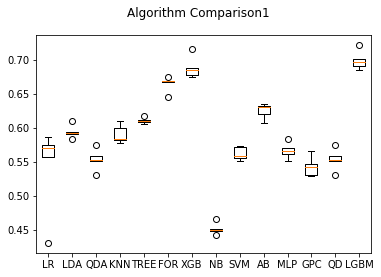

(14, 3)


,model,f1_score,std
13,LGBM,0.699066,0.012458
6,XGB,0.688405,0.014499
5,FOR,0.664790,0.010277
9,AB,0.624761,0.010002
4,TREE,0.610866,0.004106
1,LDA,0.593985,0.008802
3,KNN,0.590635,0.012406
10,MLP,0.566195,0.010570
8,SVM,0.561542,0.008900
2,QDA,0.553450,0.014405


In [220]:
# evaluate each model in turn
results = []
names = []
scores = str()
score_list = []
scoring = f1_score

for name, model in tqdm_notebook(models):
    kfold = model_selection.KFold(n_splits = 5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    f1 = cv_results.mean()
    std = cv_results.std()
    scores = {'model' : name, 'f1_score' : f1, 'std' :std} 
    score_list.append(scores)
    print(f1, "(",std,")")


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison1')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('compare Models1')
plt.show()


score_list = pd.DataFrame.from_dict(score_list)
score_list = score_list[["model", "f1_score", "std"]]
score_list = score_list.sort_values(by="f1_score", ascending = False)
print(score_list.shape)
score_list.head(10)

# 4. Fit

In [ ]:
model = xgb.XGBClassifier(max_depth = 10, n_estimators=1000, learning_rate = 0.001, seed=37) 

model

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape

In [ ]:
%%time
## 3시간 48분
## 3시간 47분

model.fit(X_train, y_train)

# 5. Importances of Features

In [ ]:
## Model이 골라낸 Feature의 중요도 입니다.
## 트리를 형성할 때, 우선 순위를 결정한다고 생각하시면 되겠습니다. 

In [ ]:
importances = pd.DataFrame(columns=['feature_names', 'importances'])
imp = model.feature_importances_
print(len(imp))
print(len(feature_names))

In [ ]:
importances["feature_names"] = feature_names[0: len(imp)]
importances["importances"] = imp
importances = importances.sort_values(by = "importances", ascending = False)     ## 내림차순 정렬
importances.index = range(len(importances))                                      ## 순서대로 번호 매김
importances

In [ ]:
feature_names = importances.loc[importances["importances"] > 0.002, "feature_names"].tolist()

# 6. Predict

In [ ]:
predictions = model.predict(X_test)
predictions

# 7. Submission

In [ ]:
test["label"] = str()

submission = test[["acc_id", "label"]]

submission["label"] = predictions

submission.to_csv("bigcon_Submission.csv", index = False)